In [3]:
import  pandas as pd
from sklearn.metrics import  *
import os


data=pd.read_csv("C:\\ML\\loan prediction.csv")

#preprocessing
data.isnull().sum()

#Missing categorical values with mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

#Median ,not mean because there are outliers in loan amount
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

#Dummy variable
data1= data.iloc[:,1:-1]
data1=pd.get_dummies(data1,columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],drop_first=True)

X=data1.values
y=data.iloc[:,-1].values


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=10)


#scaling



In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [19]:
X_train=sc.fit_transform(X_train)

In [20]:
X_test=sc.transform(X_test)

In [38]:
from sklearn.neighbors import  KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


print('The accuracy on training data is:{:.3f}'.format(knn.score(X_train,y_train)))  #model evaluation
print('The accuracy on testing data is:{:.3f}'.format(knn.score(X_test,y_test)))



The accuracy on training data is:0.830
The accuracy on testing data is:0.786


In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=("Y","N"))
print(cm)




[[106   7]
 [ 26  15]]


In [40]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(knn,X,y,cv=10) # Data not scaled
print ('{:.3f}'.format(accuracies.mean()))

0.616


In [41]:
#Pipeline
from sklearn.pipeline import make_pipeline
clf=make_pipeline(sc,knn)
accuracies1=cross_val_score(clf,X,y,cv=10)
print ('{:.3f}'.format(accuracies1.mean()))

0.775


Text(0.5, 0, 'No. of neighbors')

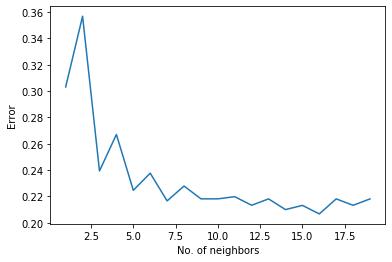

In [42]:
#Elbow ,ethod to get optimum value of k
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
neighbors=range(1,20)
k_score=[]
for n in neighbors:
    knn1=KNeighborsClassifier(n_neighbors=n)
    clf1=make_pipeline(sc,knn1)
    accuracies2=cross_val_score(clf1,X,y,cv=10)
    k_score.append(1-accuracies2.mean())
    #print ('{:.3f}'.format(1-accuracies2.mean()))


plt.plot(neighbors,k_score)
plt.ylabel("Error")
plt.xlabel("No. of neighbors")

In [43]:
knn2=KNeighborsClassifier(n_neighbors=7)
clf3=make_pipeline(sc,knn2)
accuracies4=cross_val_score(clf3,X,y,cv=10)
print ('{:.3f}'.format(accuracies4.mean()))

0.783
